# Task 2: Customer Segmentation Using Unsupervised Learning

The objective of this task is to segment customers based on their spending habits using unsupervised learning techniques. 
K-Means clustering is applied to identify distinct customer groups, which can help businesses design targeted marketing strategies.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")


In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape


(200, 5)

In [6]:
df.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


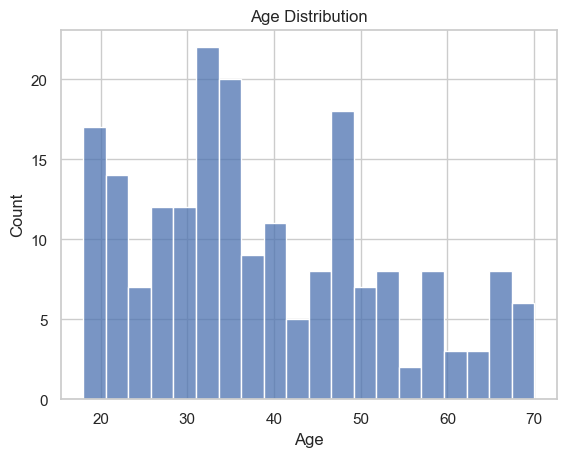

In [9]:
plt.figure()
sns.histplot(df['Age'], bins=20)
plt.title("Age Distribution")
plt.show()


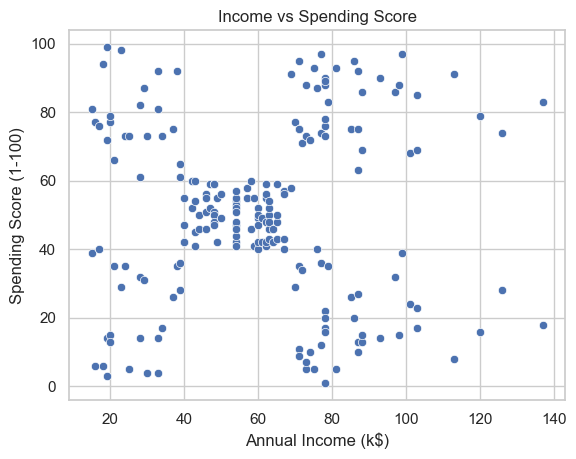

In [10]:
plt.figure()
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    data=df
)
plt.title("Income vs Spending Score")
plt.show()


# Exploratory Data Analysis

- Customers show varied spending behavior across income levels.
- Some customers with moderate income have high spending scores.
- This suggests income alone does not determine spending behavior.


In [11]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [12]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


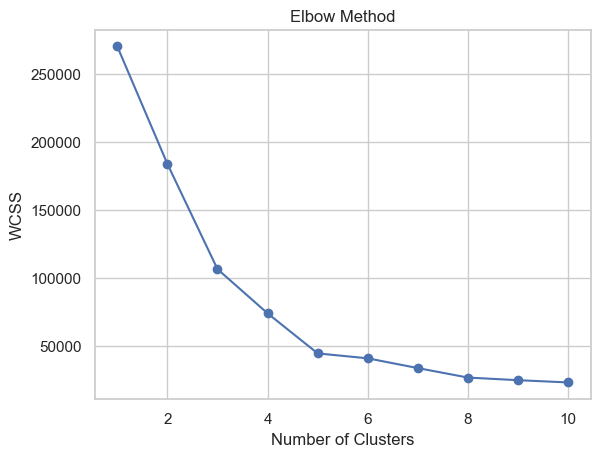

In [13]:
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [14]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


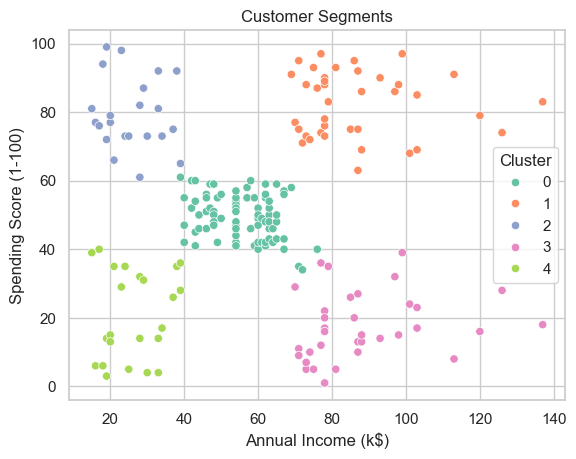

In [15]:
plt.figure()
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set2'
)
plt.title('Customer Segments')
plt.show()


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]


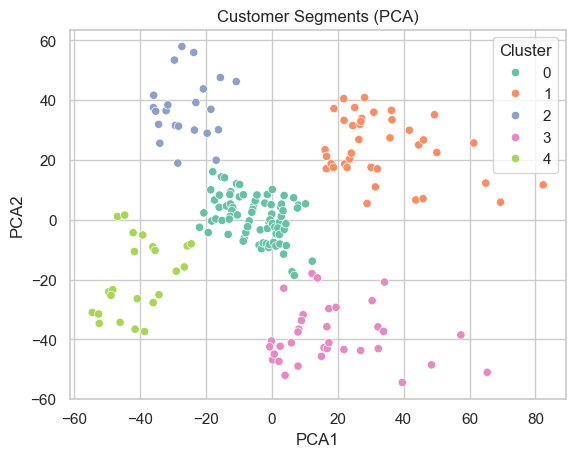

In [17]:
plt.figure()
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=df,
    palette='Set2'
)
plt.title('Customer Segments (PCA)')
plt.show()


### Customer Segments & Marketing Strategies

- **Cluster 0:** High income, high spending → Premium offers, loyalty rewards
- **Cluster 1:** High income, low spending → Personalized promotions
- **Cluster 2:** Low income, high spending → Discounts & value deals
- **Cluster 3:** Low income, low spending → Budget-friendly campaigns
- **Cluster 4:** Average income & spending → Upselling opportunities
